In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### We can import the data set. The dataframe name is now df
dftech = pd.read_csv('ret_porttech.csv',index_col=[0]) ### index_col=[0] removes default unnamed index column
dfecom = pd.read_csv('ret_portecom.csv',index_col=[0])
dffood = pd.read_csv('ret_portfood.csv',index_col=[0])

In [3]:
dfmerge = pd.merge(dftech,dfecom, on = ['day', 'month','year'])
dfmerge.columns=['BroadR','IntelR','MicroCR','MicronR','QualR','SamR','SKR','SMICR','day','month',
                 'year','AliR','AmazR','EbayR','RakR','SunR','WayR','ZalR','JDR'] ### Rename the columns
dfmerge = pd.merge(dfmerge,dffood, on = ['day', 'month','year'])

In [4]:
print(dfmerge)

        BroadR    IntelR   MicroCR   MicronR     QualR      SamR       SKR  \
0    -0.007147 -0.005204 -0.000470 -0.008461  0.001070 -0.008811 -0.016000   
1    -0.015882 -0.001649 -0.019461 -0.011244  0.001221 -0.016732  0.009631   
2     0.013167  0.003570  0.017265 -0.003171 -0.000305  0.017838  0.022118   
3     0.002150  0.003557  0.011554  0.013520  0.001830  0.027787  0.031781   
4     0.020138 -0.001914  0.006653  0.006247 -0.000305  0.000538  0.004028   
...        ...       ...       ...       ...       ...       ...       ...   
1108  0.013770  0.003932  0.011997 -0.003756  0.009974  0.016508  0.019881   
1109  0.014546  0.006648  0.006463  0.044173  0.007470  0.006278  0.003929   
1110  0.006298  0.008732  0.012574 -0.015799  0.011318  0.004994  0.000000   
1111  0.005382  0.001352  0.002383  0.034163  0.007439 -0.014351  0.008223   
1112 -0.011258 -0.001738 -0.013233 -0.023994 -0.018812 -0.006365  0.031010   

         SMICR   day  month  ...      ZalR       JDR    TysonR 

In [5]:
trainingset = dfmerge[(dfmerge['year']<2021)]
testset = dfmerge[(dfmerge['year']==2021)]
testsetall = testset ### choose all of test set
testset = testset.iloc[0:111,:] ### choose only the first half year of test set
print(trainingset)
print(testset)

       BroadR    IntelR   MicroCR   MicronR     QualR      SamR       SKR  \
0   -0.007147 -0.005204 -0.000470 -0.008461  0.001070 -0.008811 -0.016000   
1   -0.015882 -0.001649 -0.019461 -0.011244  0.001221 -0.016732  0.009631   
2    0.013167  0.003570  0.017265 -0.003171 -0.000305  0.017838  0.022118   
3    0.002150  0.003557  0.011554  0.013520  0.001830  0.027787  0.031781   
4    0.020138 -0.001914  0.006653  0.006247 -0.000305  0.000538  0.004028   
..        ...       ...       ...       ...       ...       ...       ...   
884  0.009792 -0.004107 -0.007638 -0.014516 -0.003139 -0.009635 -0.030637   
885 -0.017798  0.008626 -0.006961 -0.006981  0.004228  0.021889  0.030637   
886  0.000973  0.000000 -0.003809  0.001133 -0.007082  0.011502 -0.021414   
887 -0.006598  0.048112 -0.008032 -0.006389  0.005064  0.019760  0.014501   
888  0.013405 -0.013043  0.011988  0.024063  0.009784  0.033902  0.021323   

        SMICR   day  month  ...      ZalR       JDR    TysonR  PepsicoR  \


In [6]:
### Now delete columns day, month, year; but before that keep day, month, year separately for later concatenation
dytrain=trainingset["day"]
mthtrain=trainingset["month"]
yrtrain=trainingset["year"]
del(trainingset['day'],trainingset['month'],trainingset['year'])
dytest=testset["day"]
mthtest=testset["month"]
yrtest=testset["year"]
del(testset['day'],testset['month'],testset['year'])
del(testsetall['day'],testsetall['month'],testsetall['year'])
print(trainingset) ### Note the file contains daily cont cpd returns

       BroadR    IntelR   MicroCR   MicronR     QualR      SamR       SKR  \
0   -0.007147 -0.005204 -0.000470 -0.008461  0.001070 -0.008811 -0.016000   
1   -0.015882 -0.001649 -0.019461 -0.011244  0.001221 -0.016732  0.009631   
2    0.013167  0.003570  0.017265 -0.003171 -0.000305  0.017838  0.022118   
3    0.002150  0.003557  0.011554  0.013520  0.001830  0.027787  0.031781   
4    0.020138 -0.001914  0.006653  0.006247 -0.000305  0.000538  0.004028   
..        ...       ...       ...       ...       ...       ...       ...   
884  0.009792 -0.004107 -0.007638 -0.014516 -0.003139 -0.009635 -0.030637   
885 -0.017798  0.008626 -0.006961 -0.006981  0.004228  0.021889  0.030637   
886  0.000973  0.000000 -0.003809  0.001133 -0.007082  0.011502 -0.021414   
887 -0.006598  0.048112 -0.008032 -0.006389  0.005064  0.019760  0.014501   
888  0.013405 -0.013043  0.011988  0.024063  0.009784  0.033902  0.021323   

        SMICR      AliR     AmazR  ...      ZalR       JDR    TysonR  \
0  

<Figure size 640x480 with 0 Axes>

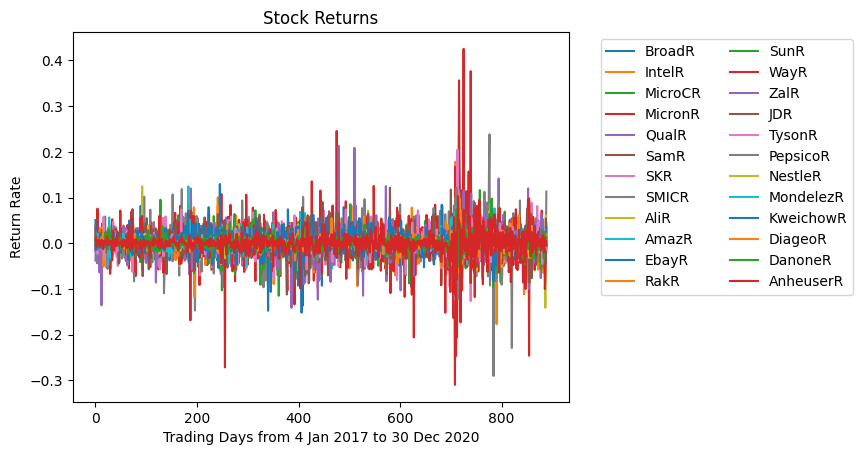

In [7]:
fig = plt.figure()
trainingset.plot()
### redo the legend instead of default position in the plot box
### place legend outside and also split legend into 2 cols
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2) 
### bbox_to_anchor parameters are distances from right edge of graph
plt.title("Stock Returns")
plt.ylabel("Return Rate")
plt.xlabel("Trading Days from 4 Jan 2017 to 30 Dec 2020")
plt.show()

In [8]:
count = np.isinf(dfmerge).values.sum() ### Checking for infinite values using isinf() and displaying the count
print(count)

0


In [9]:
# Finding the simple correlation matrix from a series of returns
corr_matrix = trainingset.corr()
print(corr_matrix)

             BroadR    IntelR   MicroCR   MicronR     QualR      SamR  \
BroadR     1.000000  0.561325  0.677492  0.600893  0.577452  0.118570   
IntelR     0.561325  1.000000  0.648618  0.592514  0.524100  0.066441   
MicroCR    0.677492  0.648618  1.000000  0.698010  0.547158  0.148455   
MicronR    0.600893  0.592514  0.698010  1.000000  0.506498  0.183777   
QualR      0.577452  0.524100  0.547158  0.506498  1.000000  0.036172   
SamR       0.118570  0.066441  0.148455  0.183777  0.036172  1.000000   
SKR        0.154193  0.125854  0.193805  0.288913  0.078379  0.664308   
SMICR      0.129260  0.128111  0.153104  0.133455  0.112965  0.205982   
AliR       0.451022  0.422234  0.459626  0.464008  0.378726  0.102266   
AmazR      0.457432  0.461590  0.474770  0.459800  0.420567  0.043948   
EbayR      0.344139  0.337060  0.362459  0.348141  0.329855  0.129263   
RakR       0.204374  0.204482  0.214038  0.176992  0.159640  0.073963   
SunR       0.068138  0.126211  0.072906  0.060603  

In [10]:
testsetall.shape

(224, 24)

In [11]:
### find the mean of returns in all of 2021 and use this as if it is found as forward predictor from a powerful algo
### the first 111 returns from 2021 are then viewed as sampling numbers that may deviate from this forward predictor BUT
### with a much smaller variance than if we had used the historical means
fwdmu = np.mean(testsetall,axis=0)*252

In [12]:
### Ref: https://www.kaggle.com/code/trangthvu/efficient-frontier-optimization/notebook
import scipy
### All weights, of course, must be between 0 and 1. Thus we set 0 and 1 as the boundaries.
from scipy.optimize import Bounds
bounds = Bounds(0, 1)  ### No shortsale

### The second boundary is the sum of weights.
from scipy.optimize import LinearConstraint 
linear_constraint = LinearConstraint(np.ones((trainingset.shape[1],), dtype=int),1,1) 
  ### 1,1 in argument of LinearConstraint refers to Lb, Ub in Lb <= A.dot(w) <= Ub; if Lb=Ub, it implies equality constraint
  ### df.shape[0] refers to no. rows, .shape[1] refers to no. cols; np.ones fill up with ones  
  ### Above: np.ones((trainingset.shape[1],), dtype=int) is A, i.e. 1 x 24 elements of ones as trainingset.shape[1] gives dim of cols
  ### Then A'w = 1 is the constraint, i.e. sum of wts must equal to one

covar=trainingset.cov()

############# following is different from Chapter1-1, Chapter1-2
r = fwdmu ##### note we replace the historical mean of training set "r = np.mean(trainingset,axis=0)*252" with this
#############

### axis=0 means to apply calculation “column-wise”, axis=1 means to:apply calculation “row-wise”, 
### r is annualized vector mean return
### Here. mean is calculated for each XYZ stock return time series (column)

def ret(r,w):
    return r.dot(w)                              ### Note ret(r,w) is defined here. r.dot(w) is matrix multiplication of r and w
def vol(w,covar):                                ### Risk level or volatility
    return np.sqrt(np.dot(w,np.dot(w,covar))*252)### same as sqrt of w^T \Sigma w *252 -- annualized return volatility
def sharpe (ret,vol):
    return ret/vol

### Find a portfolio with the minimum risk.
from scipy.optimize import minimize
### Create x0, the first guess at the values of each stock's weight.
weights = np.ones(trainingset.shape[1])
x0 = weights/np.sum(weights) ### Start initial weight as 1/No. of cols or 1/No. of stock return series

### Define a function to calculate volatility
portfvola = lambda w: np.sqrt(np.dot(w,np.dot(w,covar))*252)  ### w is input to function lambda that outputs portfvola
res1 = minimize(portfvola,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)
   ### constraint means unit vector .dot(w) = 1; minmize chooses wts w
    
### Objective function is portfvola
### 'trust-constr' is to minimize a scalar function subject to constraints -- algorithm updates x0 till obj fn portfvola is mon
### minimize(..) function returns optimal weight w_min
### These are the weights of the stocks in the portfolio with the lowest level of risk possible.
w_min = res1.x   
### optimization full output.x gives the solution array

np.set_printoptions(suppress = False, precision=3) 
### Suppress=True means always printing floating point numbers using fixed point notation, for nos. close to zero, i.e. 0.

print(w_min) ### min var portfolio
print('return: % .4f'% (ret(r,w_min)), 'risk: % .4f'% vol(w_min,covar))  ### this is min var portfolio
### “print” treats the % as a special character you need to add, so it can know, that when you type “f”
###   the number (result) that will be printed will be a floating point type, and the “.4” tells your “print” 
###   to print only the first 4 digits after the point.

[1.095e-06 1.330e-06 7.301e-07 7.688e-07 1.500e-06 1.455e-01 3.628e-06
 2.636e-06 5.188e-06 1.846e-02 5.050e-02 2.431e-02 1.114e-01 3.920e-07
 4.081e-03 1.902e-06 4.493e-02 6.508e-02 2.958e-01 3.539e-03 7.332e-02
 9.719e-06 1.631e-01 2.069e-06]
return: -0.0171 risk:  0.1291


In [13]:
### Check sum of optimal weights of minimum variance portfolio
print(sum(w_min))

1.0


In [14]:
### Define 1/Sharpe_ratio as invSharpe
invSharpe = lambda w: np.sqrt(np.dot(w,np.dot(w,covar))*252)/r.dot(w)
res2 = minimize(invSharpe,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)
### Objective function is invSharpe -- inverse of Sharpe ratio
#These are the weights of the stocks in the portfolio with the highest Sharpe ratio - call the weight vector w_Sharpe

w_Sharpe = res2.x  
   ### constraint means unit vector .dot(w) = 1; minmize chooses wts w
   ### optimization full output.x gives the solution array of optimal weights in min inverse Sharpe ratio or max Sharpe ratio
 
print(w_Sharpe)  ### max Sharpe ratio portf
print('return: % .4f'% (ret(r,w_Sharpe)), 'risk: % .4f'% vol(w_Sharpe,covar))  ### this is max Sharpe ratio portfolio
### “print” treats the % as a special character you need to add, so it can know, that when you type “f”
###   the number (result) that will be printed will be a floating point type, and the “.4” tells your “print” 
###   to print only the first 4 digits after the point.

print( 1/(  np.sqrt(np.dot(w_Sharpe,np.dot(w_Sharpe,covar))*252)/r.dot(w_Sharpe) ) )
### Above is optimized objective function -- the max Sharpe ratio.
### It can also be found using print(sharpe(ret(r,w_Sharpe),vol(w_Sharpe,covar)))

[1.774e-01 8.640e-08 1.352e-07 1.348e-07 3.606e-07 2.363e-07 5.560e-02
 7.114e-08 2.821e-08 1.256e-07 2.617e-01 3.330e-07 3.437e-08 3.768e-08
 7.433e-08 5.520e-08 1.547e-01 2.973e-07 2.101e-06 1.978e-07 1.881e-07
 3.505e-01 1.553e-07 5.105e-08]
return:  0.3329 risk:  0.2037
1.6342072556529794


In [15]:
### Check sum of optimal weights of maximum Sharpe ratio portfolio
print(sum(w_Sharpe))

0.9999999999989444


In [16]:
### View full output of min var portfolio optimization in res1
print(res1)

           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: 0.12914537195733208
                 x: [ 1.095e-06  1.330e-06 ...  1.631e-01  2.069e-06]
               nit: 61
              nfev: 1300
              njev: 52
              nhev: 0
          cg_niter: 256
      cg_stop_cond: 4
              grad: [ 1.734e-01  1.635e-01 ...  1.291e-01  1.522e-01]
   lagrangian_grad: [-3.060e-15 -7.293e-15 ...  5.140e-09 -7.262e-15]
            constr: [array([ 1.000e+00]), array([ 1.095e-06,  1.330e-06, ...,  1.631e-01,
                            2.069e-06])]
               jac: [array([[ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                             1.000e+00]]), array([[ 1.000e+00,  0.000e+00, ...,  0.000e+00,
                             0.000e+00],
                           [ 0.000e+00,  1.000e+00, ...,  0.000e+00,
                             0.000e+00],
                           ...,
                         

******************************************************************


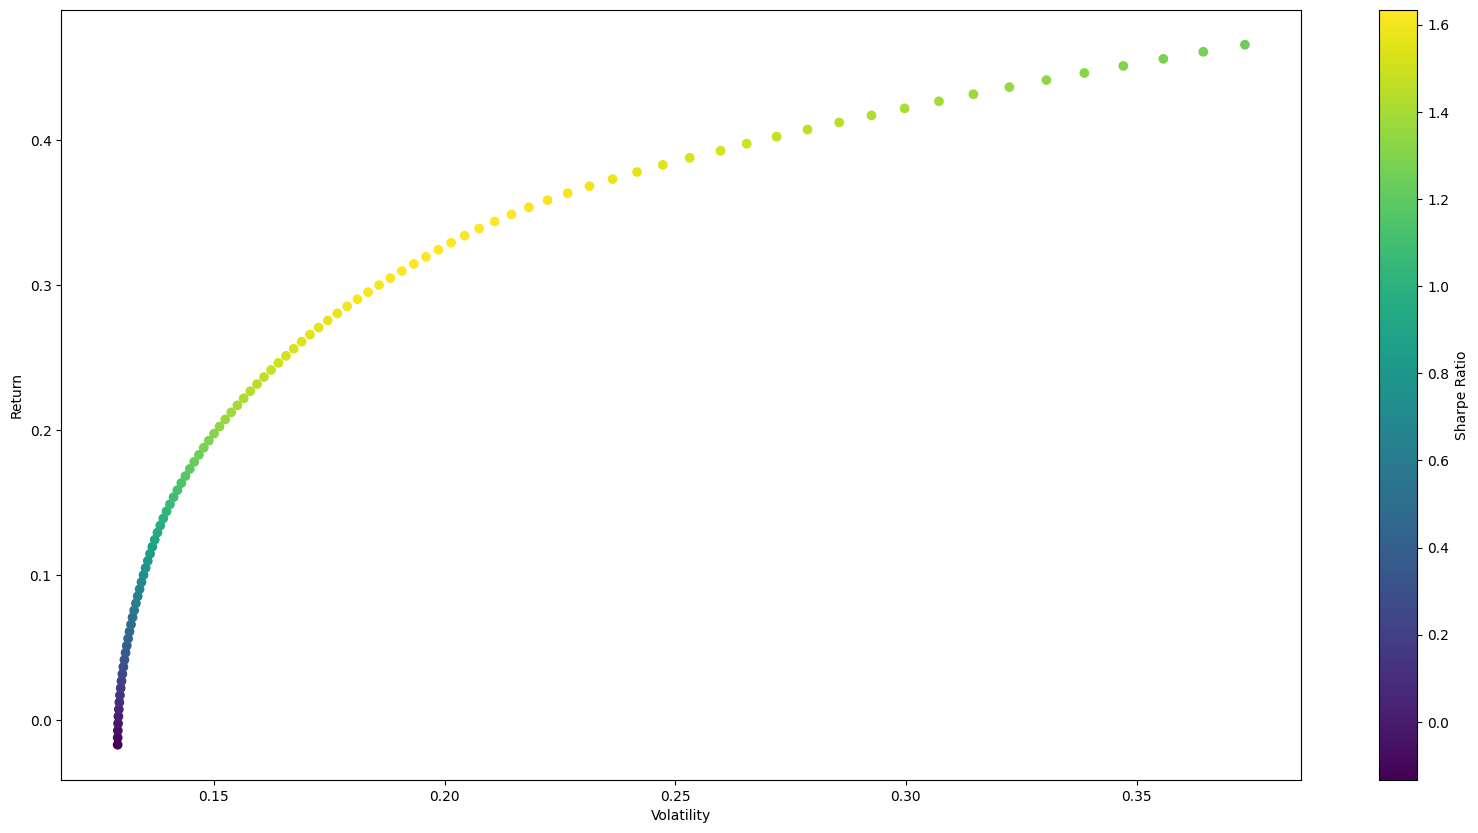

In [17]:
w = w_min   ### w is now optimal portfolio weights, sum to 1
num_ports = 100
gap = (np.amax(r) - ret(r,w_min))/num_ports 
### np.amax in numpy returns max in the array -- since weights sum to 1 and are bounded in (0,1). max portf ret is amax(r)
### The aboove range given by gap starts at ret given by Min Var Portf to Max of all mean returns -- maximum possibe

all_weights = np.zeros((num_ports, len(trainingset.columns)))   ### all_weights is 2D 100 x 24 zero matrix
### Note: len(trainingset.columns) is 24 -- there are 24 stocks here
### print(np.shape(all_weights)) gives (100,24) -- same as print(all_weights.shape) that gives (100,24)

print("******************************************************************")
##########################################################################################################################

ret_arr = np.zeros(num_ports) ### this is a 1-tuple of 100 zeros
vol_arr = np.zeros(num_ports)

for i in range(num_ports): ### this means looping from i=0 to 1,2,3,4,....,99 (100 loops in total)
    port_ret = ret(r,w) + i*gap
    double_constraint = LinearConstraint([np.ones(trainingset.shape[1]),r],[1,port_ret],[1,port_ret])
      ### Above, objective minimization is doubly constrained to have wts sum to one and Sum wts x rets sum to port_ret
      ### above means np.ones(dfret.shape[1]) or A * w >< 1,1; r * w >< port_ret, i.e. constraints port wts sum to 1 and 
      ### portf exp return == port_ret
    ### Create x0: initial guesses for weights.
    x0 = w_min
    ### Define a function for portfolio volatility.
    portfstderr = lambda w1: np.sqrt(np.dot(w1,np.dot(w1,covar))*252)
    optweight = minimize(portfstderr,x0,method='trust-constr',constraints = double_constraint,bounds = bounds)
    
    all_weights[i,:]=optweight.x  ### 24 x 1 optimal wts at row i
    ret_arr[i]=port_ret
    vol_arr[i]=vol(optweight.x,covar)

### Indented paras after "for i..." form the loop
    
sharpe_arr = ret_arr/vol_arr  ### sharpe_arr is 100 x 1 array since it is ret_arr[100]/vol_arr[100] element by element

plt.figure(figsize=(20,10))  ### opt portf based on cov of training set and fwdmu 
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis') 
### in plt.scatter, c is a scalar or sequence of n numbers to be mapped to colors using cmap 
### in plt, for sequential plots, 'viridis' gives colors across the 3D representation of vol_arr, ret_arr, sharpe_arr
### c= in front of third dimension sharpe_arr gives the colors in that dimension, otherwise dots will be all blue
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [18]:
print(sharpe_arr)

[-0.133 -0.095 -0.057 -0.019  0.018  0.056  0.094  0.131  0.168  0.206
  0.243  0.28   0.317  0.353  0.39   0.426  0.462  0.498  0.533  0.569
  0.604  0.639  0.673  0.707  0.741  0.775  0.808  0.841  0.874  0.906
  0.937  0.968  0.999  1.029  1.058  1.087  1.115  1.142  1.169  1.195
  1.221  1.245  1.27   1.293  1.316  1.337  1.359  1.379  1.398  1.417
  1.435  1.453  1.47   1.486  1.501  1.516  1.53   1.543  1.555  1.566
  1.577  1.586  1.594  1.601  1.608  1.614  1.618  1.623  1.626  1.629
  1.632  1.634  1.634  1.633  1.63   1.625  1.619  1.612  1.602  1.59
  1.577  1.563  1.547  1.531  1.51   1.496  1.479  1.461  1.443  1.425
  1.407  1.389  1.371  1.353  1.335  1.317  1.299  1.281  1.264  1.247]


In [19]:
print(all_weights.shape)

(100, 24)


In [20]:
np.set_printoptions(suppress = True, precision=3) 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(all_weights)

[[0.    0.    0.    ... 0.    0.163 0.   ]
 [0.    0.    0.    ... 0.    0.161 0.   ]
 [0.    0.    0.    ... 0.    0.159 0.   ]
 ...
 [0.9   0.    0.    ... 0.    0.    0.   ]
 [0.933 0.    0.    ... 0.    0.    0.   ]
 [0.967 0.    0.    ... 0.    0.    0.   ]]


In [21]:
print(all_weights .dot(np.ones(24))) ### check if for each of the 100 portfolio on eff frontier, wts sum to one

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


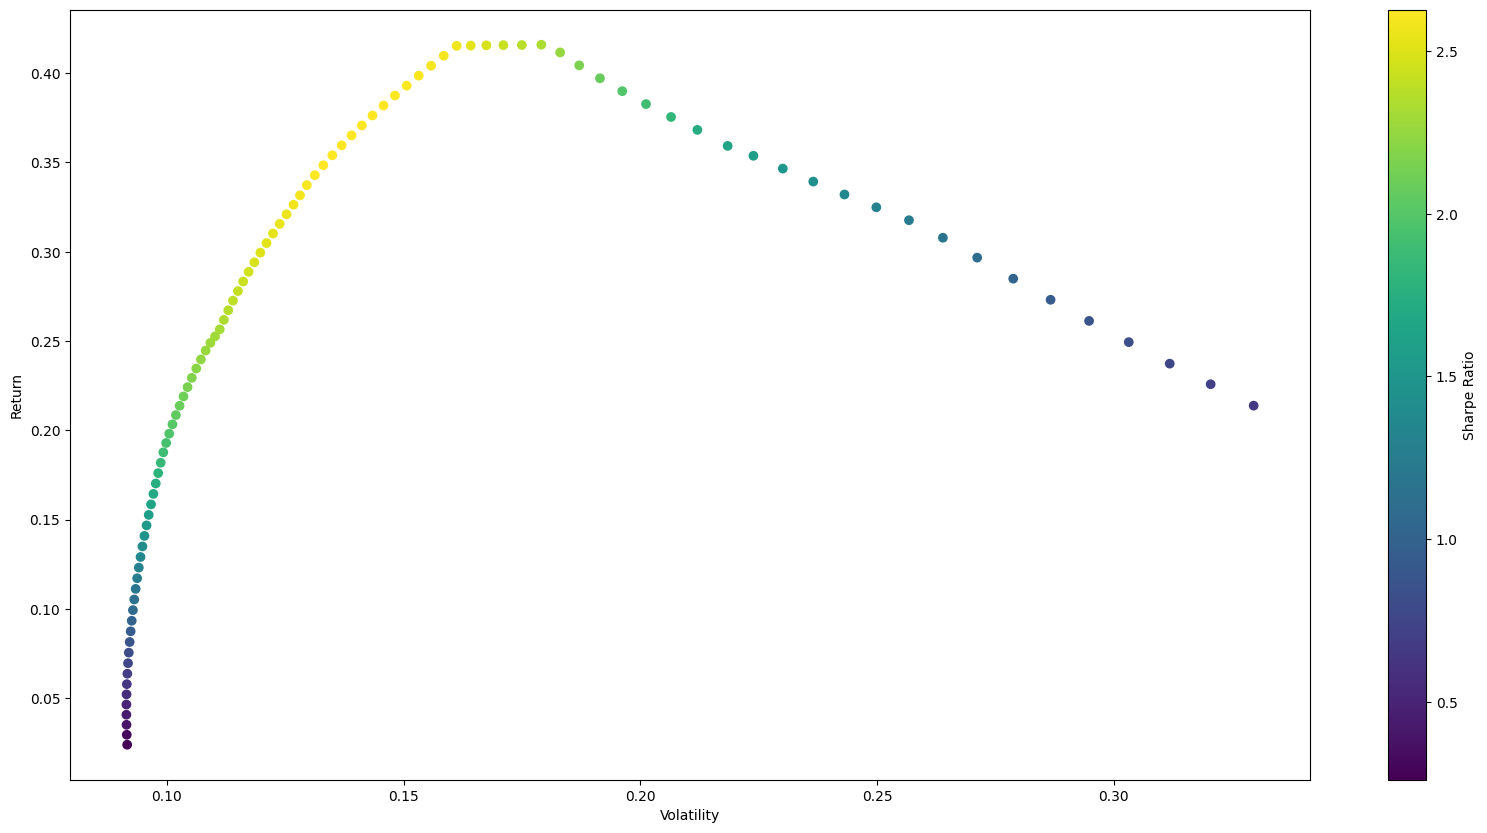

In [22]:
### Below the test set data is used with the optimal wts to form the ex-post eff portf frontier
### all_weights was obtained from the optimal wts computed with fwd predictor for mean and training set cov

testcovar=testset.cov()
testr = np.mean(testset,axis=0)*252 

### initialize
testport_ret = np.zeros(num_ports)
testport_vol = np.zeros(num_ports)

for i in range(num_ports):
    testport_ret[i] = ret(testr,all_weights[i,:])
    testport_vol[i]= vol(all_weights[i,:],testcovar)
    
testport_sharpe = testport_ret/testport_vol

plt.figure(figsize=(20,10)) ### opt portf based on cov of test set and fwdmu 
plt.scatter(testport_vol, testport_ret, c=testport_sharpe, cmap='viridis') 
### in plt.scatter, c is a scalar or sequence of n numbers to be mapped to colors using cmap 
### in plt, for sequential plots, 'viridis' gives colors across the 3D representation of vol_arr, ret_arr, sharpe_arr
### c= in front of third dimension sharpe_arr gives the colors in that dimension, otherwise dots will be all blue
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [23]:
print(testport_ret)

[0.024 0.029 0.035 0.041 0.046 0.052 0.058 0.064 0.07  0.075 0.081 0.087
 0.093 0.099 0.105 0.111 0.117 0.123 0.129 0.135 0.141 0.147 0.153 0.158
 0.164 0.17  0.176 0.182 0.188 0.193 0.198 0.203 0.209 0.214 0.219 0.224
 0.229 0.235 0.24  0.245 0.249 0.253 0.257 0.262 0.267 0.273 0.278 0.283
 0.289 0.294 0.299 0.305 0.31  0.316 0.321 0.326 0.332 0.337 0.343 0.348
 0.354 0.36  0.365 0.371 0.376 0.382 0.387 0.393 0.399 0.404 0.41  0.415
 0.415 0.416 0.416 0.416 0.416 0.412 0.404 0.397 0.39  0.383 0.375 0.368
 0.359 0.354 0.347 0.339 0.332 0.325 0.318 0.308 0.297 0.285 0.273 0.261
 0.249 0.237 0.226 0.214]


In [24]:
print(testport_vol)

[0.092 0.092 0.091 0.091 0.091 0.091 0.092 0.092 0.092 0.092 0.092 0.092
 0.093 0.093 0.093 0.093 0.094 0.094 0.094 0.095 0.095 0.096 0.096 0.097
 0.097 0.098 0.098 0.099 0.099 0.1   0.1   0.101 0.102 0.103 0.103 0.104
 0.105 0.106 0.107 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116
 0.117 0.118 0.12  0.121 0.122 0.124 0.125 0.127 0.128 0.13  0.131 0.133
 0.135 0.137 0.139 0.141 0.143 0.146 0.148 0.151 0.153 0.156 0.158 0.161
 0.164 0.167 0.171 0.175 0.179 0.183 0.187 0.191 0.196 0.201 0.206 0.212
 0.218 0.224 0.23  0.237 0.243 0.25  0.257 0.264 0.271 0.279 0.287 0.295
 0.303 0.312 0.32  0.33 ]


In [25]:
print(all_weights[0:20,:]) 
### print only first 20 rows of 100 rows of all_weights -- formed according to required return divided in [18]

all_weights.shape

[[0.    0.    0.    0.    0.    0.145 0.    0.    0.    0.018 0.05  0.024
  0.111 0.    0.004 0.    0.045 0.065 0.296 0.003 0.073 0.    0.163 0.   ]
 [0.    0.    0.    0.    0.    0.146 0.    0.    0.    0.018 0.053 0.025
  0.107 0.    0.003 0.    0.046 0.065 0.299 0.002 0.074 0.    0.161 0.   ]
 [0.    0.    0.    0.    0.    0.146 0.    0.    0.    0.017 0.055 0.025
  0.103 0.    0.003 0.    0.048 0.066 0.302 0.001 0.075 0.    0.159 0.   ]
 [0.    0.    0.    0.    0.    0.147 0.    0.    0.    0.016 0.057 0.025
  0.099 0.    0.002 0.    0.049 0.066 0.304 0.    0.076 0.    0.158 0.   ]
 [0.    0.    0.    0.    0.    0.147 0.    0.    0.    0.015 0.06  0.026
  0.095 0.    0.001 0.    0.051 0.065 0.307 0.    0.077 0.    0.156 0.   ]
 [0.    0.    0.    0.    0.    0.148 0.    0.    0.    0.015 0.062 0.026
  0.09  0.    0.001 0.    0.052 0.065 0.31  0.    0.078 0.    0.154 0.   ]
 [0.    0.    0.    0.    0.    0.148 0.    0.    0.    0.014 0.064 0.026
  0.086 0.    0.    0.    0.054 

(100, 24)

In [26]:
origmean=np.mean(trainingset,axis=0)*252
origmean1=pd.Series(origmean)
fwdmu1=pd.Series(fwdmu)
testr1=pd.Series(testr)
# Combine 3 series.
df2=pd.concat([origmean1,fwdmu1,testr1],axis=1)
df2.columns =['TrainingSet_Means', 'Forward_Predicted_Means', 'TestSet_Means']
print(df2)

           TrainingSet_Means  Forward_Predicted_Means  TestSet_Means
BroadR              0.286417                 0.470443       0.204632
IntelR              0.116410                 0.016049       0.225270
MicroCR             0.253299                 0.243650       0.071833
MicronR             0.384098                 0.250944       0.262756
QualR               0.289594                 0.285015      -0.021806
SamR                0.277415                -0.010463      -0.051485
SKR                 0.306904                 0.167307       0.081670
SMICR               0.066511                -0.228100       0.093388
AliR                0.224909                -0.690943      -0.199983
AmazR               0.358371                 0.021768       0.021125
EbayR               0.131242                 0.320447       0.756070
RakR                0.025977                 0.078155       0.446730
SunR               -0.112776                -0.766110      -0.906423
WayR                0.486958      

In [27]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(df2['TrainingSet_Means'], df2['TestSet_Means'])
mse2 = mean_squared_error(df2['Forward_Predicted_Means'], df2['TestSet_Means'])
print(mse1,mse2)

0.116442351249891 0.07040596164238469
